In [2]:
from sklearn.datasets import make_blobs              #导入数据生成器
from sklearn.neighbors import KNeighborsClassifier   # 导入 KNN 分类器
import matplotlib.pyplot as plt                      # 导入画图工具
from sklearn.model_selection import train_test_split #导入数据集拆分工具


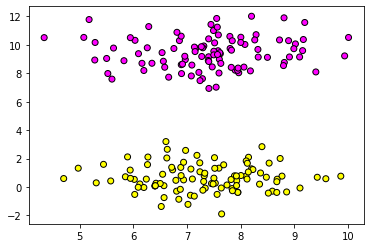

In [21]:

#生成数据集 样本 200 聚类中心为 2
data, labels = make_blobs(n_samples=200, centers =2,random_state=8)
x, y = data[:,0], data[:,1]  # x 是 数据坐标 ， y 是标签， 即是 0 还是 1
#可视化数据
plt.scatter(x, y, c=labels, cmap=plt.cm.spring, edgecolor='k')
plt.show()

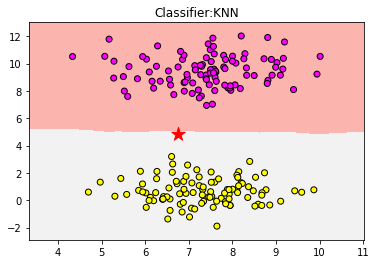

In [26]:
import numpy as np
clf = KNeighborsClassifier()
clf.fit(data,labels)                #用已知的数据训练
#下面的代码用于画图
x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
#根据范围线性插值矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
#xx 为 y 行的x 矩阵 ， yy 为 x 列的y 矩阵
# ravel 是将矩阵一行一行个展开
# np.c_ 是将[1,2,3] and [7,5,3] 合成[[1,7],[2,5],[3,3]]
resLabel = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #将每个线性插值进行分类
resLabel = resLabel.reshape(xx.shape) #根据 xx 矩阵重塑
# x y z 三位图 用颜色区分 z
plt.pcolormesh(xx, yy, resLabel, cmap=plt.cm.Pastel1, shading='auto') 

#重新绘画点
plt.scatter(x, y, c=labels, cmap=plt.cm.spring, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:KNN")
plt.scatter(6.75,4.82, marker='*',c='red', s=200) #画出那个点
plt.show()

In [23]:
print('新数据点的分类是：',clf.predict([[6.75,4.82]])) #显示预测

新数据点的分类是： [1]


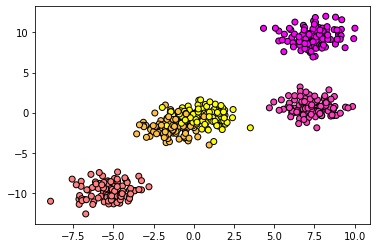

In [24]:
data2 = make_blobs(n_samples=500, centers=5,random_state=8)
X2,y2 = data2
plt.scatter(X2[:,0],X2[:,1],c=y2, cmap=plt.cm.spring,edgecolor='k')
plt.show()

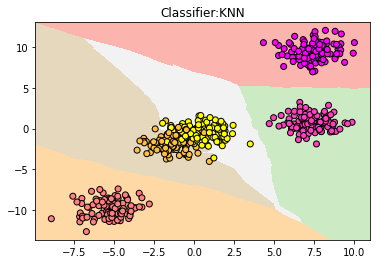

In [34]:
clf = KNeighborsClassifier()
clf.fit(X2,y2)  #训练数据
#下面的代码用于画图
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1, shading='auto')
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.spring, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:KNN")
#plt.scatter(6.75,4.82, marker='*',c='red', s=200)
plt.show()

In [28]:
print('模型正确率：{:.2f}'.format(clf.score(X2,y2)))

模型正确率：0.96


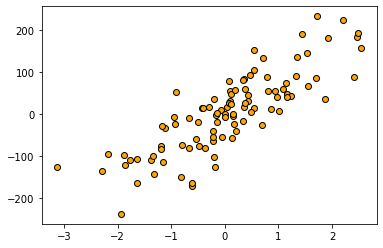

In [30]:
from sklearn.datasets import make_regression
X, y = make_regression(n_features=1,n_informative=1,noise=50,random_state=8)
plt.scatter(X,y,c='orange',edgecolor='k')
plt.show()

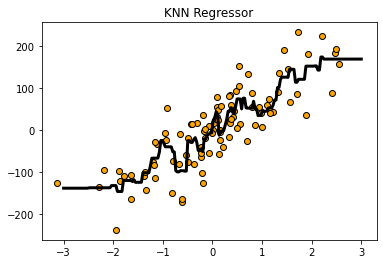

In [33]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(X,y)
z = np.linspace(-3,3,200).reshape(-1,1) #转化为 一列
plt.scatter(X,y,c='orange',edgecolor='k')
plt.plot(z, reg.predict(z),c='k',linewidth=3)
plt.title('KNN Regressor')
plt.show()

In [32]:
print('模型评分：{:.2f}'.format(reg.score(X,y)))

模型评分：0.77


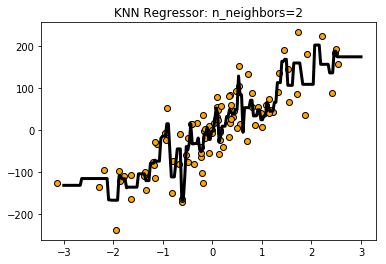

In [126]:
from sklearn.neighbors import KNeighborsRegressor
reg2 = KNeighborsRegressor(n_neighbors=2) # 改变 k
reg2.fit(X,y)
plt.scatter(X,y,c='orange',edgecolor='k')
plt.plot(z, reg2.predict(z),c='k',linewidth=3)
plt.title('KNN Regressor: n_neighbors=2')
plt.show()

In [125]:
print('模型评分：{:.2f}'.format(reg2.score(X,y)))

模型评分：0.86
